In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline 

date — день, в который происходят события

time — точное время события

event — тип события, может быть или показ или клик по рекламе

platform — платформа, на которой произошло рекламное событие

ad_id — id рекламного объявления

client_union_id — id рекламного клиента

campaign_union_id — id рекламной кампании

ad_cost_type — тип объявления с оплатой за клики (CPC) или за показы (CPM)

ad_cost — стоимость объявления в рублях, для CPC объявлений — это цена за клик, для CPM — цена за 1000 показов

has_video — есть ли у рекламного объявления видео

target_audience_count — размер аудитории, на которую таргетируется объявление

In [ ]:
# Получить статистику по дням. 
# Просто посчитать число всех событий по дням, число показов, число кликов, число уникальных объявлений и уникальных кампаний.
# Разобраться, почему случился такой скачок 2019-04-05? Каких событий стало больше? У всех объявлений или только у некоторых?

# Найти топ 10 объявлений по CTR за все время. CTR — это отношение всех просмотров объявления к кликам. Например, если у объявления было 100 показов и 2 клика, CTR = 0.02. Различается ли средний и медианный CTR объявлений в наших данных?

# Похоже, в наших логах есть баг, объявления приходят с кликами, но без показов! 
# Сколько таких объявлений, есть ли какие-то закономерности? Эта проблема наблюдается на всех платформах?

# Есть ли различия в CTR у объявлений с видео и без? А чему равняется 95 процентиль CTR по всем объявлениям за 2019-04-04?

# Для финансового отчета нужно рассчитать наш заработок по дням. В какой день мы заработали больше всего? В какой меньше? Мы списываем с клиентов деньги, если произошел клик по CPC объявлению, и мы списываем деньги за каждый показ CPM объявления, если у CPM объявления цена - 200 рублей, то за один показ мы зарабатываем 200 / 1000.
# Какая платформа самая популярная для размещения рекламных объявлений? Сколько процентов показов приходится на каждую из платформ (колонка platform)?

# А есть ли такие объявления, по которым сначала произошел клик, а только потом показ?

In [2]:
ads_data = pd.read_csv('/home/jupyter-v-lobanova-17/shared/ads_data.csv.zip', compression='zip')

In [3]:
ads_data

,ad_id,time,event,date,ad_cost_type,has_video,client_union_id,campaign_union_id,platform,ad_cost,target_audience_count,user_id
0,23456,1554076848,view,2019-04-01,CPM,0,5681,23456,android,190.0,125560,793
1,111941,1554135866,view,2019-04-01,CPM,0,111793,111941,ios,215.2,32277,1041
2,111941,1554135866,view,2019-04-01,CPM,0,111793,111941,ios,215.2,32277,41
3,42987,1554135866,view,2019-04-01,CPM,0,28541,42985,ios,199.1,80160,898
4,23456,1554135866,view,2019-04-01,CPM,0,5681,23456,web,190.0,125560,29
...,...,...,...,...,...,...,...,...,...,...,...,...
3176709,112583,1554501092,view,2019-04-06,CPM,0,111818,112260,android,199.4,239408,5467
3176710,112583,1554501092,view,2019-04-06,CPM,0,111818,112260,android,199.4,239408,2508
3176711,112583,1554501092,click,2019-04-06,CPM,0,111818,112260,web,199.4,239408,7896
3176712,112583,1554501092,view,2019-04-06,CPM,0,111818,112260,ios,199.4,239408,4319


In [5]:
ads_data['full_date'] = pd.to_datetime(ads_data.time, unit='s')
#создание новой колонки со временем и датой в формате 2019-04-01 00:00:48

In [6]:
ads_data['date'] = pd.to_datetime(ads_data.date)
#колонка date была в формкте строки перевели в формат даты

In [7]:
ads_data.head()

,ad_id,time,event,date,ad_cost_type,has_video,client_union_id,campaign_union_id,platform,ad_cost,target_audience_count,user_id,full_date
0,23456,1554076848,view,2019-04-01,CPM,0,5681,23456,android,190.0,125560,793,2019-04-01 00:00:48
1,111941,1554135866,view,2019-04-01,CPM,0,111793,111941,ios,215.2,32277,1041,2019-04-01 16:24:26
2,111941,1554135866,view,2019-04-01,CPM,0,111793,111941,ios,215.2,32277,41,2019-04-01 16:24:26
3,42987,1554135866,view,2019-04-01,CPM,0,28541,42985,ios,199.1,80160,898,2019-04-01 16:24:26
4,23456,1554135866,view,2019-04-01,CPM,0,5681,23456,web,190.0,125560,29,2019-04-01 16:24:26


In [8]:
# Получить статистику по дням. 
# Просто посчитать число всех событий по дням, число показов, число кликов, число уникальных объявлений и уникальных кампаний.
# Разобраться, почему случился такой скачок 2019-04-05? Каких событий стало больше? У всех объявлений или только у некоторых?


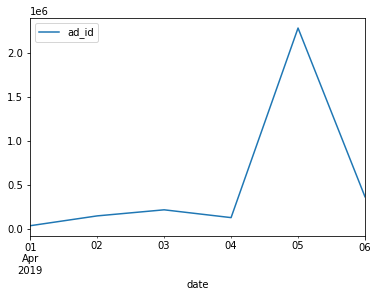

In [9]:
ads_data.groupby('date') \
    .agg({'ad_id': 'count'}).plot()

In [10]:
ads_data.groupby(['date','event'], as_index=False) \
    .agg({'ad_id': 'count'})

,date,event,ad_id
0,2019-04-01,click,735
1,2019-04-01,view,34832
2,2019-04-02,click,1518
3,2019-04-02,view,145811
4,2019-04-03,click,1678
5,2019-04-03,view,214851
6,2019-04-04,click,1517
7,2019-04-04,view,126182
8,2019-04-05,click,501595
9,2019-04-05,view,1783288


In [11]:
#считаем кол-во просмотров и кликов
ads_data.groupby(['date','event'], as_index=False) \
    .agg({'ad_id': 'count'}) \
    .pivot(index = 'date', columns = 'event', values = 'ad_id')

event,click,view
date,,
2019-04-01,735,34832
2019-04-02,1518,145811
2019-04-03,1678,214851
2019-04-04,1517,126182
2019-04-05,501595,1783288
2019-04-06,80420,284287


In [12]:
ads_data.groupby(['date','event'], as_index=False) \
    .agg({'ad_id': 'count'}) \
    .pivot(index = 'date', columns = 'event', values = 'ad_id').reset_index()
#reset_index() сброс индексов, чтобы можно было обратиться ко всем данным колонкам

event,date,click,view
0,2019-04-01,735,34832
1,2019-04-02,1518,145811
2,2019-04-03,1678,214851
3,2019-04-04,1517,126182
4,2019-04-05,501595,1783288
5,2019-04-06,80420,284287


In [14]:
ads_data[ads_data.date == '2019-04-05'] \
    .groupby('ad_id') \
    .agg({'time': 'count'}) \
    .sort_values('time', ascending=False) \
    .head()
    
#найдено объявление, у которого наибольшее число событий

,time
ad_id,
112583,2166611
29927,27186
44635,8268
46583,7327
44956,5656


In [15]:
ad_id = 112583

In [16]:
ads_data.query('ad_id == @ad_id') \
    .groupby('date') \
    .agg({'time': 'count'}) 
#посмотрели всю историю робъявления. оно было всего 2 дня

,time
date,
2019-04-05,2166611
2019-04-06,348613


In [17]:
ads_data.query('ad_id == @ad_id').head(1)

,ad_id,time,event,date,ad_cost_type,has_video,client_union_id,campaign_union_id,platform,ad_cost,target_audience_count,user_id,full_date
527124,112583,1554480636,view,2019-04-05,CPM,0,111818,112260,web,199.4,239408,4355,2019-04-05 16:10:36


In [18]:
# Найти топ 10 объявлений по CTR за все время. CTR — это отношение всех просмотров объявления к кликам. 
#Например, если у объявления было 100 показов и 2 клика, CTR = 0.02. 
#Различается ли средний и медианный CTR объявлений в наших данных?


In [109]:
ads_data_by_ad = ads_data.groupby(['ad_id', 'event'], as_index=False) \
    .agg({'time': 'count'}) \
    .pivot(index='ad_id', columns='event', values='time').reset_index()
#для каждого объявления найдено кол-во кликов и просмотров

In [112]:
ads_data_by_ad = ads_data_by_ad.assign(ctr = ads_data_by_ad.click / ads_data_by_ad.view,
                        ctr_per = 100 * ads_data_by_ad.click / ads_data_by_ad.view)

In [113]:
ads_data_by_ad

event,ad_id,click,view,ctr,ctr_per
0,3,9.0,490.0,0.018367,1.836735
1,2132,1.0,95.0,0.010526,1.052632
2,2276,2.0,1454.0,0.001376,0.137552
3,2475,NaN,132.0,NaN,NaN
4,2643,3.0,286.0,0.010490,1.048951
...,...,...,...,...,...
350,121941,1.0,640.0,0.001563,0.156250
351,121943,15.0,1722.0,0.008711,0.871080
352,122042,1.0,155.0,0.006452,0.645161
353,122063,1.0,260.0,0.003846,0.384615


In [22]:
ads_data_by_ad.sort_values('ctr', ascending=False).head(10)

event,ad_id,click,view,ctr,ctr_per
289,112583,580436.0,1934788.0,0.300000,29.999979
324,119450,258.0,1254.0,0.205742,20.574163
125,38575,43.0,257.0,0.167315,16.731518
144,40968,29.0,217.0,0.133641,13.364055
207,45642,42.0,344.0,0.122093,12.209302
283,110924,11.0,95.0,0.115789,11.578947
194,45043,28.0,245.0,0.114286,11.428571
96,35034,112.0,997.0,0.112337,11.233701
5,4585,53.0,476.0,0.111345,11.134454
328,120347,236.0,2168.0,0.108856,10.885609


In [23]:
#Различается ли средний и медианный CTR объявлений в наших данных?
#да разлечаются в 2 раза
ads_data_by_ad.ctr.mean()

0.020628096080757954

In [24]:
ads_data_by_ad.ctr.median()

0.010753240746688594

/opt/tljh/user/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


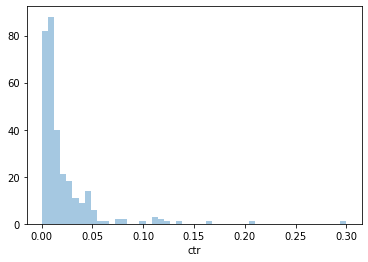

In [25]:
sns.distplot(ads_data_by_ad.ctr, kde = False)

In [26]:
# Похоже, в наших логах есть баг, объявления приходят с кликами, но без показов! 
# Сколько таких объявлений, есть ли какие-то закономерности? 

In [27]:
ads_data_by_ad

event,ad_id,click,view,ctr,ctr_per
0,3,9.0,490.0,0.018367,1.836735
1,2132,1.0,95.0,0.010526,1.052632
2,2276,2.0,1454.0,0.001376,0.137552
3,2475,NaN,132.0,NaN,NaN
4,2643,3.0,286.0,0.010490,1.048951
...,...,...,...,...,...
350,121941,1.0,640.0,0.001563,0.156250
351,121943,15.0,1722.0,0.008711,0.871080
352,122042,1.0,155.0,0.006452,0.645161
353,122063,1.0,260.0,0.003846,0.384615


In [28]:
ads_data_by_ad = ads_data_by_ad.fillna(0)

In [29]:
ad_ids_bug = ads_data_by_ad.query('click == 0').ad_id

In [30]:
ad_ids_bug

3        2475
26      16444
29      16678
30      16845
38      20871
43      23108
56      26427
58      26880
73      29915
78      30692
88      33802
89      33827
94      34895
132     40226
135     40307
141     40750
154     41866
157     41937
182     44327
183     44345
186     44546
188     44585
200     45365
217     46022
218     46024
220     46433
223     46452
232     46754
248     98344
261    104799
276    109397
291    113051
305    115860
307    116717
310    117095
312    117363
319    119083
341    120790
345    121513
347    121695
Name: ad_id, dtype: int64

In [31]:
#в изначальном ads_data возьмем те объявления, в которых есть баги
#Эта проблема наблюдается на всех платформах?
ads_data[ads_data.ad_id.isin(ad_ids_bug)] \
        .groupby('platform', as_index=False) \
        .agg({'ad_id': 'count'}) \
        .sort_values('ad_id')

,platform,ad_id
2,web,1988
1,ios,3075
0,android,4906


In [32]:
#собития по всем данным
ads_data \
        .groupby('platform', as_index=False) \
        .agg({'ad_id': 'count'}) \
        .sort_values('ad_id')

,platform,ad_id
2,web,635425
1,ios,953078
0,android,1588211


In [34]:
df_2019_04_04 = ads_data[ads_data.date =='2019-04-04'] .groupby(['ad_id', 'event'], as_index=False) \
    .agg({'time': 'count'}) \
    .pivot(index='ad_id', columns='event', values='time').reset_index() \
    .fillna(0)
#отобраны только значения за нужную дату

In [89]:
df_2019_04_04['ctr'] = df_2019_04_04.click / df_2019_04_04.view

In [36]:
df_2019_04_04[df_2019_04_04.click > 0].ctr.quantile(q=0.95)
# чему равняется 95 процентиль CTR по всем объявлениям за 2019-04-04

0.10211538461538454

In [38]:
# Для финансового отчета нужно рассчитать наш заработок по дням. В какой день мы заработали больше всего? 
#В какой меньше? Мы списываем с клиентов деньги, если произошел клик по CPC объявлению, и мы списываем деньги за каждый показ CPM 
#объявления, если у CPM объявления цена - 200 рублей, то за один показ мы зарабатываем 200 / 1000.
# Какая платформа самая популярная для размещения рекламных объявлений? Сколько процентов показов приходится 
#на каждую из платформ (колонка platform)?

#ad_cost — стоимость объявления в рублях, для CPC объявлений — это цена за клик, для CPM — цена за 1000 показов

In [39]:
ads_data[(ads_data.ad_cost_type == 'CPC') & (ads_data.event == 'click')].ad_cost.sum()
#отобрали CPC только те по котором был клик и соответственно есть цена за объявление
#ad_cost.sum() - найдена стоимость платных объявлений за все время

84810.0

In [40]:
ads_data[(ads_data.ad_cost_type == 'CPM') & (ads_data.event == 'view')].ad_cost.sum() /1000
#общая стоимость за 1000 показов по каждому объявлению 84810.0 + 497090.6778000003 общая сумма

497090.6778000003

In [41]:
# А есть ли такие объявления, по которым сначала произошел клик, а только потом показ?

In [42]:
ads_data.groupby(['ad_id', 'event'], as_index=False) \
    .agg({'time': 'min'}) \
    .pivot(index='ad_id', columns='event', values='time').reset_index() \
    .query('click < view')
#посчитали минимальный таймстем для клика и для просмотра

event,ad_id,click,view
27,16548,1.554336e+09,1.554336e+09
81,30939,1.554165e+09,1.554173e+09
138,40464,1.554164e+09,1.554164e+09
158,42007,1.554423e+09,1.554423e+09
185,44543,1.554336e+09,1.554337e+09
201,45436,1.554336e+09,1.554336e+09
324,119450,1.554336e+09,1.554336e+09


In [43]:
ads_data[ads_data.ad_id == 16548].sort_values('time')

,ad_id,time,event,date,ad_cost_type,has_video,client_union_id,campaign_union_id,platform,ad_cost,target_audience_count,user_id,full_date
512690,16548,1554336083,click,2019-04-04,CPM,0,722,16523,ios,196.6,53199,4133,2019-04-04 00:01:23
511482,16548,1554336278,view,2019-04-04,CPM,0,722,16523,android,196.6,53199,3736,2019-04-04 00:04:38
511439,16548,1554336352,view,2019-04-04,CPM,0,722,16523,android,196.6,53199,4968,2019-04-04 00:05:52
511438,16548,1554336352,view,2019-04-04,CPM,0,722,16523,ios,196.6,53199,4206,2019-04-04 00:05:52
511437,16548,1554336352,view,2019-04-04,CPM,0,722,16523,web,196.6,53199,3898,2019-04-04 00:05:52
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2056433,16548,1554422265,view,2019-04-05,CPM,0,722,16523,android,196.6,53199,3613,2019-04-04 23:57:45
2056432,16548,1554422265,view,2019-04-05,CPM,0,722,16523,android,196.6,53199,6044,2019-04-04 23:57:45
2056461,16548,1554422308,view,2019-04-05,CPM,0,722,16523,ios,196.6,53199,5831,2019-04-04 23:58:28
2056652,16548,1554422338,view,2019-04-05,CPM,0,722,16523,android,196.6,53199,2837,2019-04-04 23:58:58


In [44]:
retail = pd.read_csv('/home/jupyter-v-lobanova-17/lesson_5/5_data.csv.zip', encoding='ISO-8859-1', compression='zip')

In [45]:
retail.shape

(541909, 8)

In [46]:
retail_columns = ['InvoiceNo', 'StockCode', 'Description', 'Quantity', 'InvoiceDate','UnitPrice', 'CustomerID', 'Country']

In [47]:
retail.loc[retail.duplicated()]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
517,536409,21866,UNION JACK FLAG LUGGAGE TAG,1,12/1/2010 11:45,1.25,17908.0,United Kingdom
527,536409,22866,HAND WARMER SCOTTY DOG DESIGN,1,12/1/2010 11:45,2.10,17908.0,United Kingdom
537,536409,22900,SET 2 TEA TOWELS I LOVE LONDON,1,12/1/2010 11:45,2.95,17908.0,United Kingdom
539,536409,22111,SCOTTIE DOG HOT WATER BOTTLE,1,12/1/2010 11:45,4.95,17908.0,United Kingdom
555,536412,22327,ROUND SNACK BOXES SET OF 4 SKULLS,1,12/1/2010 11:49,2.95,17920.0,United Kingdom
...,...,...,...,...,...,...,...,...
541675,581538,22068,BLACK PIRATE TREASURE CHEST,1,12/9/2011 11:34,0.39,14446.0,United Kingdom
541689,581538,23318,BOX OF 6 MINI VINTAGE CRACKERS,1,12/9/2011 11:34,2.49,14446.0,United Kingdom
541692,581538,22992,REVOLVER WOODEN RULER,1,12/9/2011 11:34,1.95,14446.0,United Kingdom
541699,581538,22694,WICKER STAR,1,12/9/2011 11:34,2.10,14446.0,United Kingdom


In [48]:
retail = retail.drop_duplicates()

In [88]:
retail

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Revenue
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom,15.30
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom,20.34
...,...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,12/9/2011 12:50,0.85,12680.0,France,10.20
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,12/9/2011 12:50,2.10,12680.0,France,12.60
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,12/9/2011 12:50,4.15,12680.0,France,16.60
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,12/9/2011 12:50,4.15,12680.0,France,16.60


Имеются следующие данные о транзакциях в период с 01.12.2010 по 12.09.2011:

InvoiceNo — номер транзакции
StockCode — код товара
Description — описание товара
Quantity — количество единиц товара, добавленных в заказ
InvoiceDate — дата транзакции 
UnitPrice — цена за единицу товара
CustomerID — id клиента
Country — страна, где проживает клиент

In [50]:
#Данные содержат в себе записи как об успешных транзакциях, так и об отмененных. Если пользователь отменил заказ, 
#в начале номера транзакции (InvoiceNo) ставится C (canceled). 
#Сколько всего заказов отменили пользователи? df.string_column.str.startswith('Lolita')

In [51]:
 retail.InvoiceNo.str.startswith('C').value_counts()

False    527390
True       9251
Name: InvoiceNo, dtype: int64

In [52]:
#Продолжаем работать с датафреймом, изменённом после второго задания! Теперь отфильтруйте данные и оставьте в retail только 
#те заказы, где Quantity > 0. В качестве ответа укажите число оставшихся строк.

In [53]:
retail = retail.query('Quantity > 0')

In [54]:
retail.value_counts('Country')

Country
United Kingdom          481143
Germany                   9027
France                    8393
EIRE                      7883
Spain                     2480
Netherlands               2363
Belgium                   2031
Switzerland               1959
Portugal                  1492
Australia                 1184
Norway                    1072
Italy                      758
Channel Islands            747
Finland                    685
Cyprus                     603
Sweden                     450
Unspecified                442
Austria                    398
Denmark                    380
Poland                     330
Japan                      321
Israel                     292
Hong Kong                  280
Singapore                  222
Iceland                    182
USA                        179
Canada                     151
Greece                     145
Malta                      112
United Arab Emirates        68
European Community          60
RSA                         58


In [55]:
#Посчитайте число заказов для каждого пользователя (CustomerID) из Германии (Germany). Оставьте только тех, 
#кто совершил более N транзакций (InvoiceNo), где N – 80% процентиль. Запишите полученные id пользователей в germany_top 
#(не весь датафрейм, только id).

#Отфильтрованные данные записаны в retail
#Идентификатор заказа – InvoiceNo. Для каждого заказа в данных может встречаться более 1 строки.

germany = retail.query('Country == "Germany"') \
                .groupby('CustomerID', as_index=False) \
                .agg({'InvoiceNo':'nunique'})     

In [56]:
germany.InvoiceNo.quantile(q=0.80)
#.InvoiceNo.quantile(q=0.80) 

7.0

In [57]:
germany_top = germany.query('InvoiceNo> 7').CustomerID

In [58]:
#Используя объект с id пользователей (germany_top), полученный на предыдущем шаге, 
#отфильтруйте наблюдения и оставьте в данных записи только по интересующим нас юзерам. 
#Результирующий датафрейм запишите в top_retail_germany.

top_retail_germany = retail.query('CustomerID in @germany_top')

In [73]:
top_retail_germany

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
1109,536527,22809,SET OF 6 T-LIGHTS SANTA,6,12/1/2010 13:04,2.95,12662.0,Germany
1110,536527,84347,ROTATING SILVER ANGELS T-LIGHT HLDR,6,12/1/2010 13:04,2.55,12662.0,Germany
1111,536527,84945,MULTI COLOUR SILVER T-LIGHT HOLDER,12,12/1/2010 13:04,0.85,12662.0,Germany
1112,536527,22242,5 HOOK HANGER MAGIC TOADSTOOL,12,12/1/2010 13:04,1.65,12662.0,Germany
1113,536527,22244,3 HOOK HANGER MAGIC GARDEN,12,12/1/2010 13:04,1.95,12662.0,Germany
...,...,...,...,...,...,...,...,...
541726,581570,22139,RETROSPOT TEA SET CERAMIC 11 PC,3,12/9/2011 11:59,4.95,12662.0,Germany
541727,581570,23077,DOUGHNUT LIP GLOSS,20,12/9/2011 11:59,1.25,12662.0,Germany
541728,581570,20750,RED RETROSPOT MINI CASES,2,12/9/2011 11:59,7.95,12662.0,Germany
541729,581570,22505,MEMO BOARD COTTAGE DESIGN,4,12/9/2011 11:59,4.95,12662.0,Germany


In [81]:
#Сгруппируйте top_retail_germany по коду товара (StockCode). Какой из продуктов добавляли в корзину чаще всего, кроме POST? 
#Note: одним заказом считается единовременная покупка любого количества товара, т.е. без учета Quantity.

top_retail_germany.StockCode.value_counts()

POST     213
22326     52
22328     38
22423     34
20719     30
        ... 
23092      1
22044      1
22230      1
22608      1
22380      1
Name: StockCode, Length: 1158, dtype: int64

In [80]:
top_retail_germany.groupby('StockCode', as_index=False) \
    .agg({'Country': 'count'}) \
    .sort_values('Country',ascending=False)

,StockCode,Country
1157,POST,213
409,22326,52
411,22328,38
453,22423,34
45,20719,30
...,...,...
520,22563,1
524,22569,1
528,22574,1
529,22576,1


In [84]:
#Вернемся к анализу полного датасета retail. Создайте колонку Revenue с суммой покупки, используя колонки Quantity и UnitPrice.
#Quantity — количество единиц товара, добавленных в заказ
#UnitPrice — цена за единицу товара


In [92]:
Revenue = retail.Quantity * retail.UnitPrice

In [95]:
retail.Revenue = Revenue

In [96]:
retail

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Revenue
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom,15.30
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom,20.34
...,...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,12/9/2011 12:50,0.85,12680.0,France,10.20
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,12/9/2011 12:50,2.10,12680.0,France,12.60
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,12/9/2011 12:50,4.15,12680.0,France,16.60
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,12/9/2011 12:50,4.15,12680.0,France,16.60


In [ ]:
#Для каждой транзакции (InvoiceNo), посчитайте финальную сумму заказа. В качестве ответа укажите топ-5 (InvoiceNo) 
#по сумме заказа (через запятую с пробелом и в порядке убывания TotalRevenue)

In [103]:
retail.groupby('InvoiceNo', as_index=False) \
      .agg({'Revenue': 'sum'}) \
      .sort_values('Revenue',ascending=False)    

,InvoiceNo,Revenue
20689,581483,168469.60
2202,541431,77183.60
17582,574941,52940.94
18251,576365,50653.91
9034,556444,38970.00
...,...,...
10074,558724,0.00
10075,558725,0.00
10150,558889,0.00
20726,A563186,-11062.06


In [104]:
#создание списка для ответа

sorted_revenues = retail.groupby('InvoiceNo', as_index=False) \
                        .agg({'Revenue': 'sum'}) \
                        .sort_values('Revenue',ascending=False)
   

In [108]:
sorted_revenues.InvoiceNo[:5].str.cat(sep=', ')

'581483, 541431, 574941, 576365, 556444'